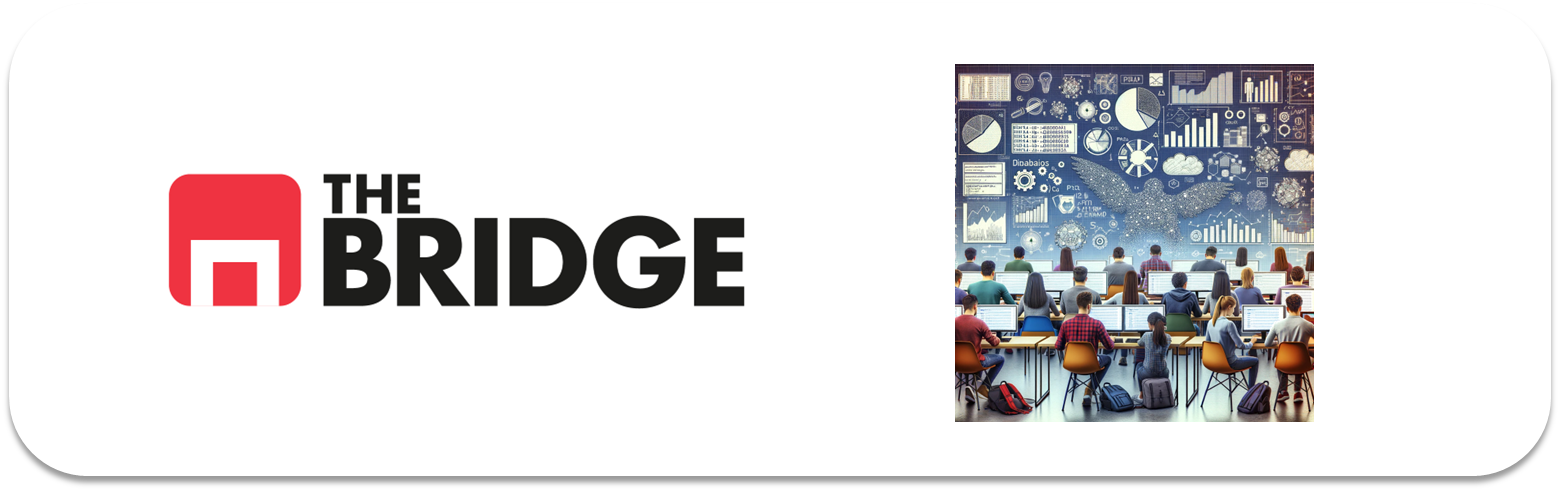

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?


Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.



In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_grouped_histograms
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep = "|")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
df.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.


In [5]:
target = "MEDV"

df["MEDV"].value_counts()

MEDV
50.0    16
25.0     8
23.1     7
22.0     7
21.7     7
        ..
12.6     1
16.4     1
17.7     1
12.0     1
8.1      1
Name: count, Length: 229, dtype: int64

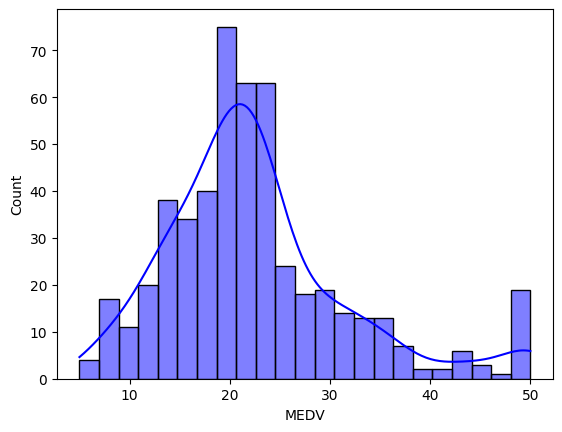

In [6]:
sns.histplot(df['MEDV'], color='Blue', kde = True)
plt.show()

Presenta una función de densidad bastante normal, así que es una buena candidata para realizar una regresión.

3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.


In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

4. Construye las parejas X,y de train y test


In [8]:
X_train = train_set.drop(columns= [target])
y_train = train_set[target]

X_test = test_set.drop(columns = [target])
y_test = test_set[target]

5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.


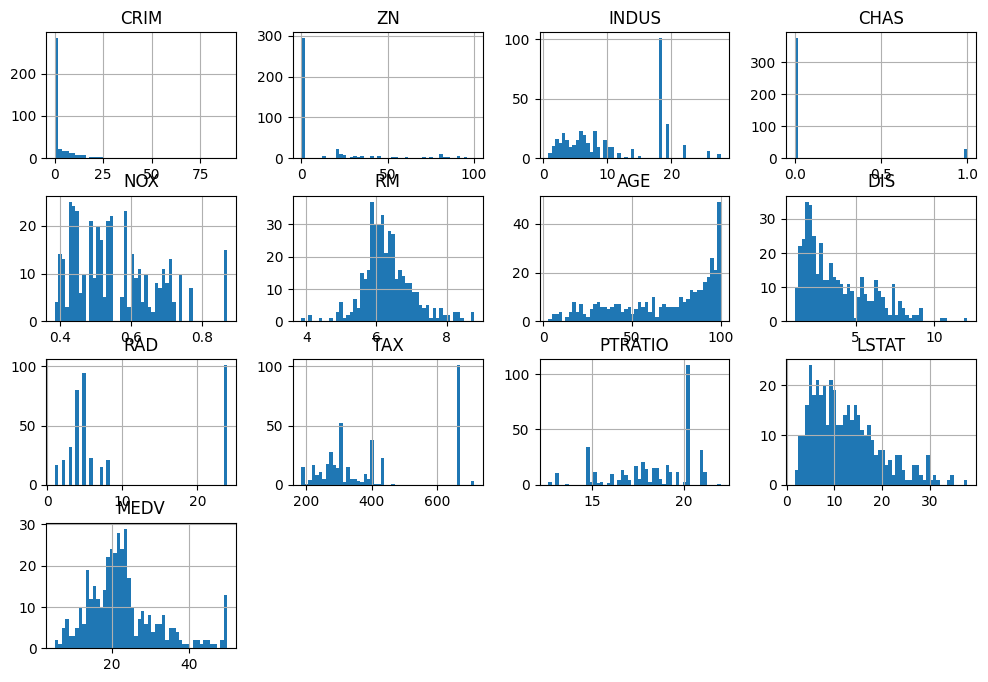

In [9]:
train_set.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

- Tenemos las escalas de las variables bastante diferentes.
- MEDV está en miles de euros.
- Hay un par de variables bastante normales como RAD y especialmente TAX.
- Age tiene una una larga cola inicial
- DIS i LSTAT tiene una larga cola final
- Aparentemente no hay variables categóricas, pero sí tenemos variables numéricas discretas como CHAS y RAD, que sólo responde a unos pocos valores.

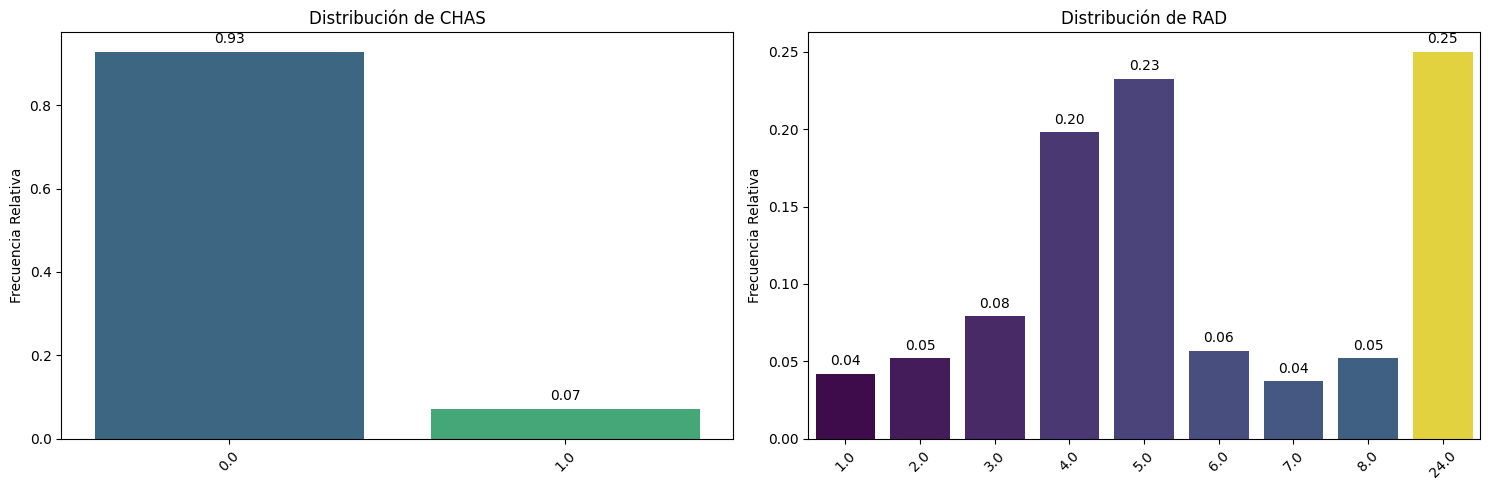

In [10]:
pinta_distribucion_categoricas(train_set, ["CHAS","RAD"], relativa= True, mostrar_valores= True)

- Sólo un 7% vive cerca del río, la gran mayoría no.
- El índice de accesibilidad sigue una tendencia bastante normal con un último valor alto. Puede que esté capado, aunque las unidades son complicadas de gestionar.

In [11]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

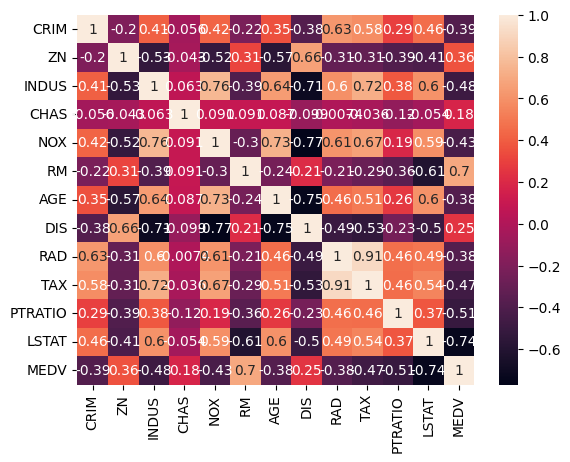

In [12]:
sns.heatmap(df.corr(numeric_only = True),annot=True);
plt.show();

- La variable objetivo (MEDV) tiene una correlación importante con RM (hab/vivienda) i una correlación moderada con ZN (proporción de terreno).
- Hay una gran anticorrelación con LSTAT (% población de estatus socioeconómico bajo) y moderada con PTRATIO (relación alumno-maestro), TAX (tasa de impuesto sobre la propiedad) y INDUS.

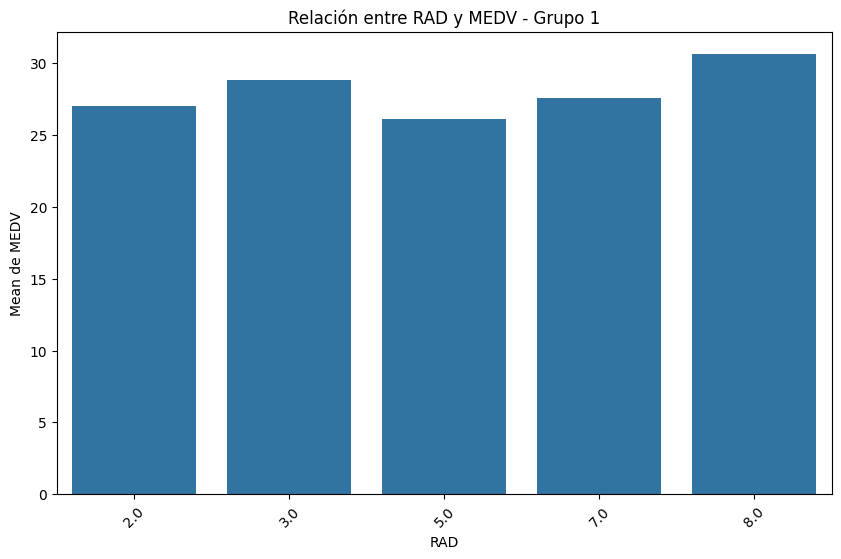

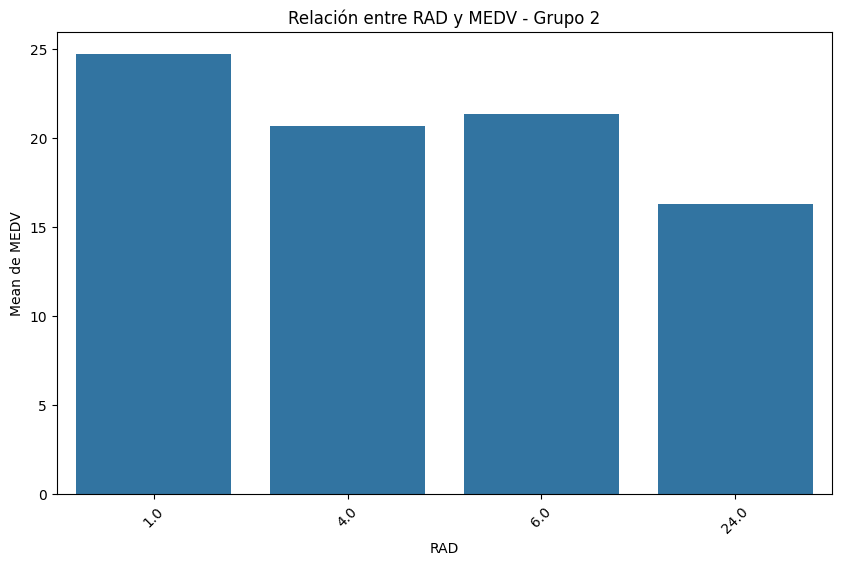

In [13]:
plot_categorical_numerical_relationship(train_set, categorical_col= "RAD", numerical_col="MEDV")

In [14]:
columnas_corr = corr_matrix["MEDV"][corr_matrix["MEDV"] > 0.3].index.to_list()

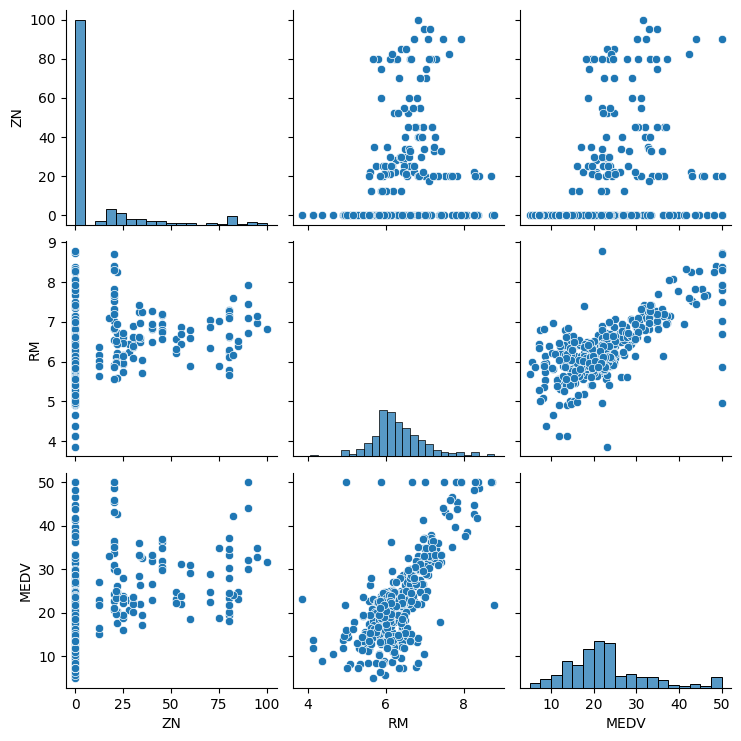

In [15]:
sns.pairplot(train_set[columnas_corr]);

In [16]:
columnas_anticorr = corr_matrix["MEDV"][corr_matrix["MEDV"] < -0.46].index.to_list()

In [17]:
columnas_anticorr = corr_matrix["MEDV"][(corr_matrix["MEDV"] < -0.46) | (corr_matrix["MEDV"] == 1)].index.to_list()

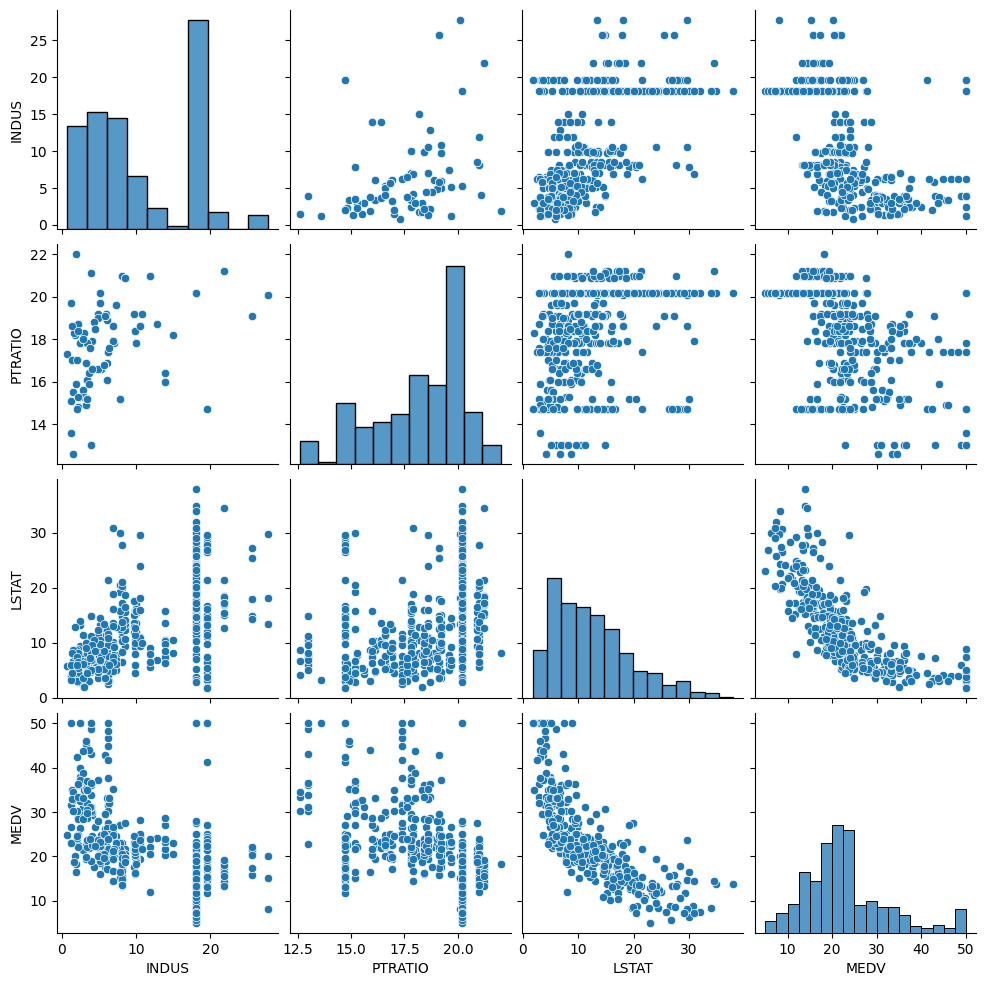

In [18]:
sns.pairplot(train_set[columnas_anticorr]);

6. Trata las variables para que funcionen lo mejor posible en el modelo.


In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

features_num = ["CRIM","ZN","INDUS","NOX","RM","AGE","DIS","TAX","PTRATIO","LSTAT"]

resultado_standardization = pd.DataFrame(std_scaler.fit_transform(train_set[features_num]),columns = features_num)
resultado_standardization.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.578434,0.845343,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.584648,1.204741,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.602724,-0.637176,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.578434,0.845343,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.584648,1.204741,-0.165787


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'CHAS'}>,
        <Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>],
       [<Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>,
        <Axes: title={'center': 'TAX'}>],
       [<Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'LSTAT'}>, <Axes: >]], dtype=object)

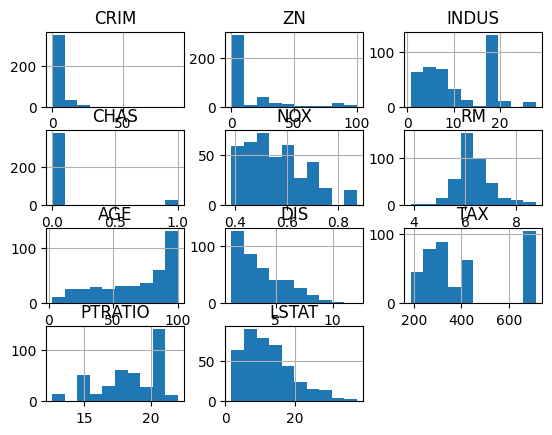

In [20]:
train_set[features_num].hist()

RM parece la más normalizada.

7. Construye un modelo de regresión lineal.


In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [23]:
lin_reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


8. Analiza si lo crees conveniente los pesos y la importancia de las features.


In [24]:
lin_reg.intercept_

np.float64(36.97046906702997)

In [25]:
lin_reg.coef_

array([-1.27195928e-01,  3.07954889e-02,  2.52477064e-02,  3.04947682e+00,
       -1.81832461e+01,  4.24009781e+00, -3.59439826e-03, -1.46550703e+00,
        2.39990397e-01, -1.12752436e-02, -8.94844726e-01, -5.37770202e-01])

In [36]:
coef_df = pd.DataFrame(lin_reg.coef_, X_train.columns, 
                      columns=['Coefficient'])
coef_df.round(6)

,Coefficient
CRIM,-0.127196
ZN,0.030795
INDUS,0.025248
CHAS,3.049477
NOX,-18.183246
RM,4.240098
AGE,-0.003594
DIS,-1.465507
RAD,0.239990
TAX,-0.011275


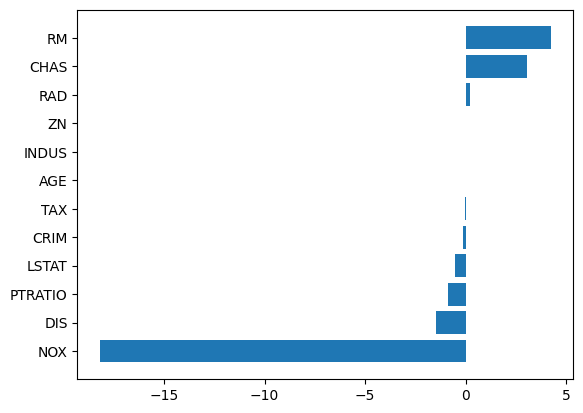

In [45]:
features = coef_df.sort_values('Coefficient')
plt.barh(features.index,features.Coefficient)
plt.show()

9. Evalúa tu modelo. Haz un pequeño assesment de su generabilidad. Compara gráficamente las predicciones con los valores reales.


In [37]:
predictions = lin_reg.predict(X_test)

In [42]:
from sklearn import metrics

pred_train = lin_reg.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lin_reg.score(X_train,y_train))

MAE train 3.4244687759495283
RMSE train 4.754396542087904
R2 train 0.739801993681731


In [43]:
pred_test = lin_reg.predict(X_test)
print('MAE test', metrics.mean_absolute_error(y_test, pred_test))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print('R2 test', lin_reg.score(X_test,y_test))

MAE test 3.111377388238152
RMSE test 4.7725997699226665
R2 test 0.6893967884614781


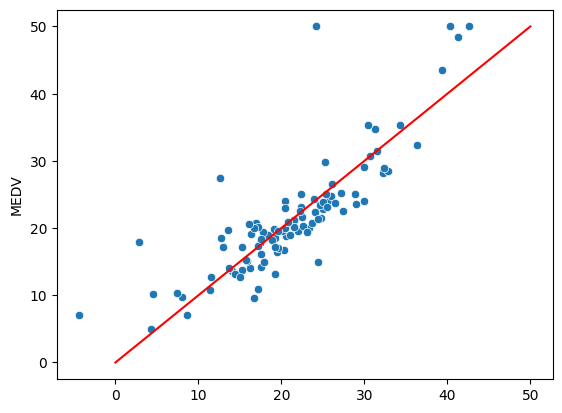

In [47]:
sns.scatterplot(x=predictions,y=y_test);
plt.plot([0,50],[0,50],'red')
plt.show()

10. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.


In [59]:
ridgeR = Ridge(alpha = 10)
ridgeR.fit(X_train, y_train)

y_pred_train = ridgeR.predict(X_train)

print("Train MAE:", round(metrics.mean_absolute_error(y_train, y_pred_train),2))
print("Train RMSE:", round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),2))
print("Train R2:", round(ridgeR.score(X_train,y_train)))

Train MAE: 3.46
Train RMSE: 4.85
Train R2: 1


In [49]:
ridgeR.fit(X_test, y_test)

y_pred_test = ridgeR.predict(X_test)

print("Test MAE:", round(metrics.mean_absolute_error(y_test, y_pred_test),2))
print("Test RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),2))
print("Test R2:", round(ridgeR.score(X_test,y_test)))

Test MAE: 2.96
Test RMSE: 4.35
Test R2: 1


In [60]:
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=125)
lassoR.fit(X_train, y_train)

print("Train MAE:", round(metrics.mean_absolute_error(y_train, lassoR.predict(X_train)),2))
print("Train RMSE:", round(np.sqrt(metrics.mean_squared_error(y_train, lassoR.predict(X_train))),2))
print("Train R2:", round(lassoR.score(X_train,y_train)))

Train MAE: 6.09
Train RMSE: 8.31
Train R2: 0


In [61]:
lassoR.fit(X_test, y_test)

print("Test MAE:", round(metrics.mean_absolute_error(y_test, lassoR.predict(X_test)),2))
print("Test RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test, lassoR.predict(X_test))),2))
print("Test R2:", round(lassoR.score(X_test,y_test)))

Test MAE: 4.97
Test RMSE: 7.45
Test R2: 0


In [62]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.2, l1_ratio = 0.7)
elastic_net.fit(X_train, y_train)

print("Train MAE:", round(metrics.mean_absolute_error(y_train, elastic_net.predict(X_train)),2))
print("Train RMSE:", round(np.sqrt(metrics.mean_squared_error(y_train, elastic_net.predict(X_train))),2))
print("Train R2:", round(elastic_net.score(X_train,y_train)))

Train MAE: 3.52
Train RMSE: 4.94
Train R2: 1


In [63]:
elastic_net.fit(X_test, y_test)

print("Test MAE:", round(metrics.mean_absolute_error(y_test, elastic_net.predict(X_test)),2))
print("Test RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test))),2))
print("Test R2:", round(elastic_net.score(X_test,y_test)))

Test MAE: 3.0
Test RMSE: 4.39
Test R2: 1


11. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?